In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv('Train.csv')

print("Dataset Info:")
print(train_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [2]:
print("\nDataset Description:")
print(train_data.describe())


Dataset Description:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%  

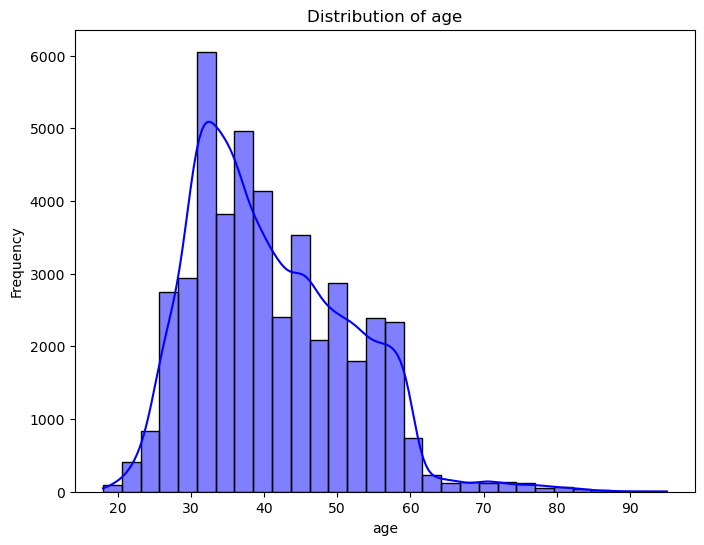

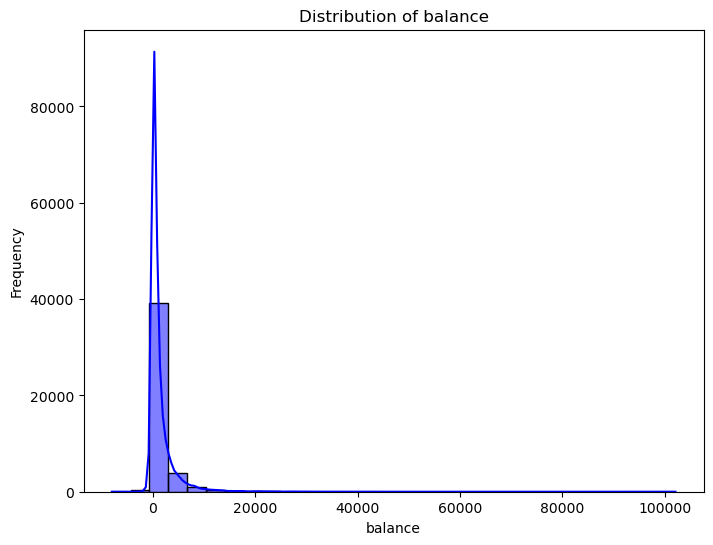

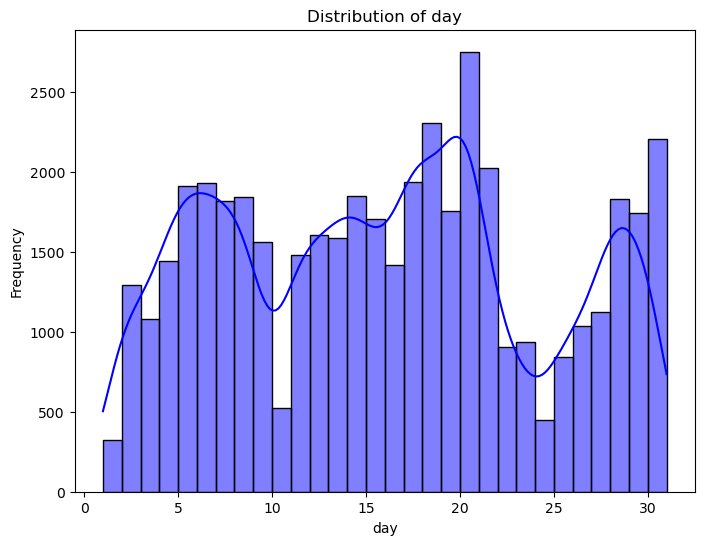

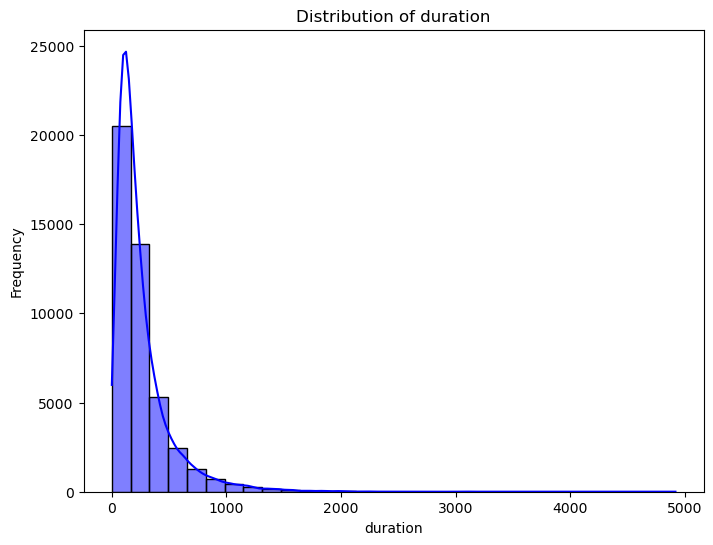

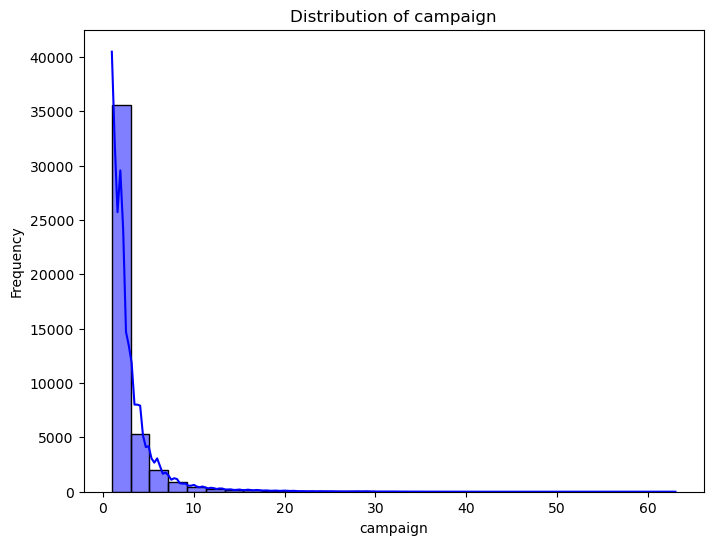

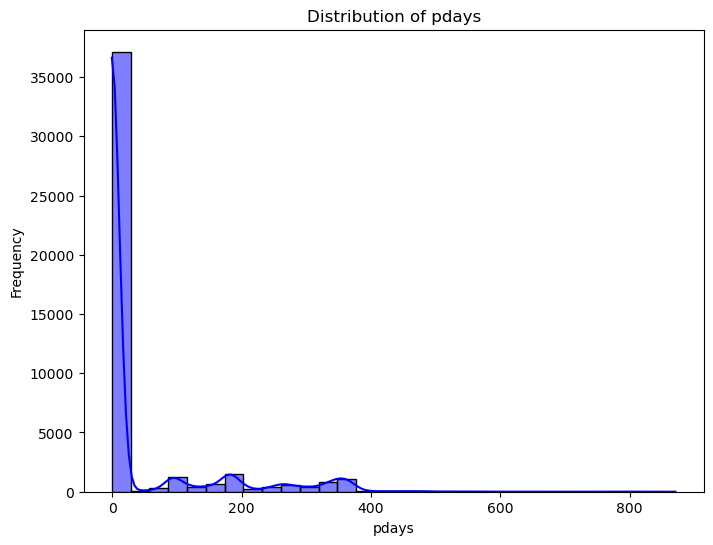

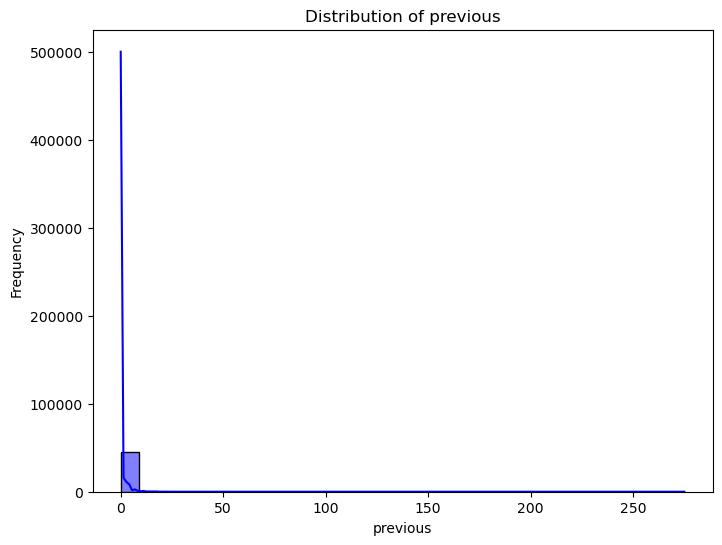

In [3]:
numerical_features = train_data.select_dtypes(include=['int64']).columns
for column in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_data[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [4]:
X_train = train_data.drop('y', axis=1)
y_train = train_data['y']

In [5]:
categorical_features = X_train.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le

In [6]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

In [7]:
test_data = pd.read_csv('Test.csv')

In [8]:
for column in categorical_features:
    test_data[column] = label_encoders[column].transform(test_data[column])

In [9]:
X_test = test_data[X_train.columns]
y_test = pd.read_csv('Test.csv')['y']

In [10]:
svm_model = SVC()


SVM Classification Report:
              precision    recall  f1-score   support

          no       0.88      1.00      0.94      4000
         yes       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



C:\Users\luka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\luka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Accuracy: 0.8848

SVM Confusion Matrix:


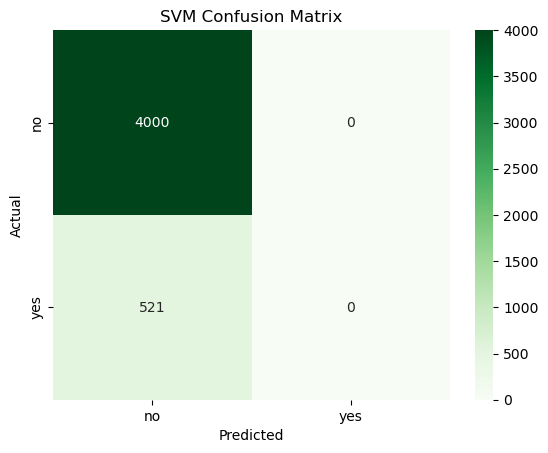

In [12]:
svm_model = SVC(C=1, kernel='rbf', gamma='scale')

svm_model.fit(X_train, y_train)

svm_predictions = svm_model.predict(X_test)

print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))

print(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")

print("\nSVM Confusion Matrix:")
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()